Example :Linear Regression

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [115]:
data = pd.read_csv('Salary_Data.csv')
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [116]:
data.shape

(30, 2)

In [117]:
data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [118]:
x=data.iloc[:,:1].values
y=data.iloc[:, 1:2].values

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [120]:
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [121]:
print(y_pred)
print(y_test)

[[115790.21011287]
 [ 71498.27809463]
 [102596.86866063]
 [ 75267.80422384]
 [ 55477.79204548]
 [ 60189.69970699]]
[[112635.]
 [ 67938.]
 [113812.]
 [ 83088.]
 [ 64445.]
 [ 57189.]]


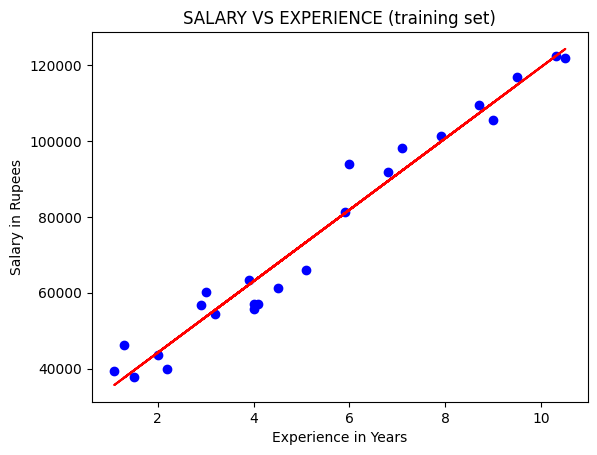

In [122]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, model.predict(x_train), color='red')
plt.title('SALARY VS EXPERIENCE (training set)')
plt.xlabel('Experience in Years')
plt.ylabel('Salary in Rupees')
plt.show()


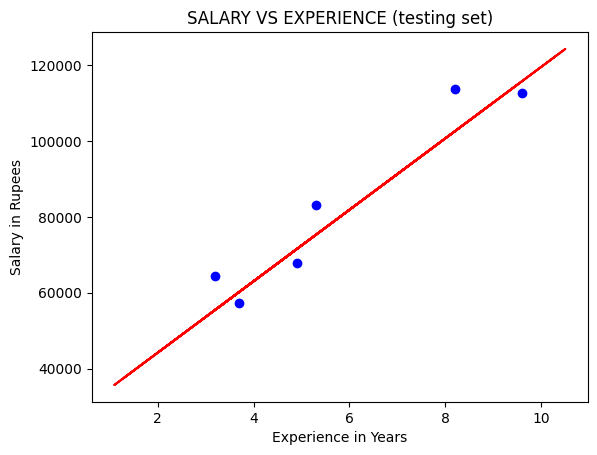

In [123]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_train, model.predict(x_train), color='red')
plt.title('SALARY VS EXPERIENCE (testing set)')
plt.xlabel('Experience in Years')
plt.ylabel('Salary in Rupees')
plt.show()

Exercise : 1 - Taxi Fare

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Book1.csv")


In [125]:
df.describe()

,taxi_id,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,483.000000,483.000000,483.000000,0.0,270.000000,399.000000,391.000000,483.000000,483.000000,483.0,483.000000,483.000000,294.000000,399.000000,399.000000,392.000000,392.000000
mean,4342.122153,631.677019,3.466253,NaN,518.081481,21.837093,22.296675,13.028571,1.588737,0.0,0.988613,15.605921,90.479592,397.411028,434.335840,414.734694,446.747449
std,2535.430164,575.450287,11.357211,NaN,352.047892,19.395022,17.518019,12.097228,2.453647,0.0,5.149666,15.100132,36.137082,250.456300,198.977985,247.374461,200.338703
min,27.000000,0.000000,0.000000,NaN,2.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,18.000000,6.000000,18.000000,6.000000
25%,2205.000000,300.000000,0.000000,NaN,225.000000,8.000000,8.000000,6.250000,0.000000,0.0,0.000000,7.250000,92.000000,170.000000,346.000000,199.000000,288.000000
50%,4444.000000,480.000000,1.000000,NaN,504.000000,8.000000,24.000000,8.250000,0.000000,0.0,0.000000,9.750000,107.000000,411.000000,478.000000,419.000000,500.000000
75%,6484.000000,780.000000,2.550000,NaN,807.000000,32.000000,32.000000,13.250000,2.000000,0.0,1.000000,15.375000,107.000000,630.000000,610.000000,660.000000,610.000000
max,8758.000000,3420.000000,200.000000,NaN,1108.000000,77.000000,77.000000,90.000000,12.560000,0.0,99.500000,102.750000,119.000000,779.000000,781.000000,779.000000,781.000000


In [126]:
cols = ['trip_seconds', 'trip_miles', 'pickup_community_area', 'dropoff_community_area', 'fare']
df = df[cols]

In [127]:
df = df.dropna()
df = df[(df['fare'] > 0) & (df['trip_miles'] > 0) & (df['trip_seconds'] > 0)]

In [128]:
X = df[['trip_seconds', 'trip_miles', 'pickup_community_area', 'dropoff_community_area']]
y = df['fare']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [131]:
y_pred = model.predict(X_test)

In [132]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 34.763709332212045
R² Score: 0.732631126970388


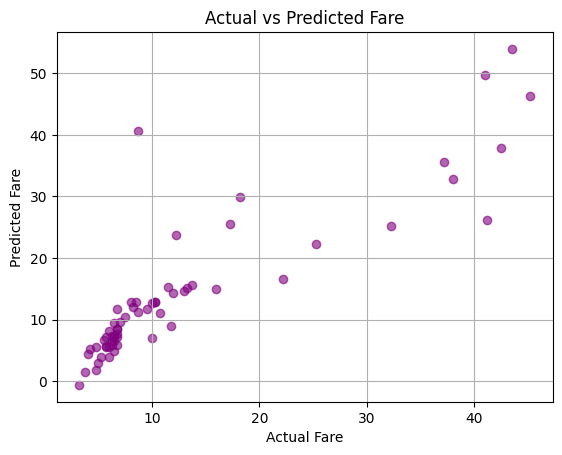

In [133]:
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare")
plt.grid(True)
plt.show()

In [134]:

new_trip = pd.DataFrame([[500, 2.5, 8, 12]], columns=['trip_seconds', 'trip_miles', 'pickup_community_area', 'dropoff_community_area'])

predicted_fare = model.predict(new_trip)

print(f"Predicted Fare for New Trip: ₹{predicted_fare[0]:.2f}")


Predicted Fare for New Trip: ₹7.72


In [135]:

for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: ₹{actual:.2f} | Predicted: ₹{predicted:.2f}")


Actual: ₹38.00 | Predicted: ₹32.82
Actual: ₹12.00 | Predicted: ₹14.30
Actual: ₹6.50 | Predicted: ₹9.47
Actual: ₹8.25 | Predicted: ₹12.06
Actual: ₹7.00 | Predicted: ₹9.61
Actual: ₹10.25 | Predicted: ₹12.77
Actual: ₹6.50 | Predicted: ₹4.91
Actual: ₹5.75 | Predicted: ₹5.67
Actual: ₹37.25 | Predicted: ₹35.67
Actual: ₹5.50 | Predicted: ₹6.61


In [136]:
df = df[df['trip_miles'] < 40]
#outliner

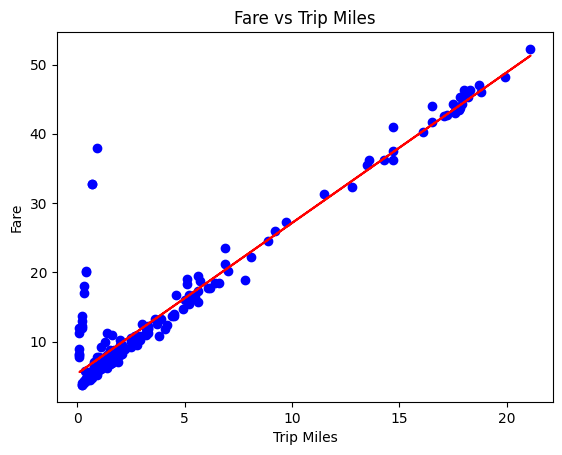

In [137]:

X = df[['trip_miles']]
y = df['fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')
plt.xlabel('Trip Miles')
plt.ylabel('Fare')
plt.title('Fare vs Trip Miles')
plt.show()


Exercise : 2 - Weight of a Person

In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = {
    'Weight': [79, 69, 73, 95, 82, 55, 69, 71, 64, 69],
    'Height': [1.80, 1.68, 1.82, 1.70, 1.87, 1.55, 1.50, 1.78, 1.67, 1.64],
    'Age': [35, 39, 25, 60, 27, 18, 89, 42, 16, 52],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female']
}

df = pd.DataFrame(data)

df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

X = df[['Height', 'Age', 'Gender_Male']]
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 76.57792714844265
R² Score: -11.252468343750825


In [139]:
new_data = pd.DataFrame([[1.75, 20, 1]], columns=['Height', 'Age', 'Gender_Male'])
predicted_weight = model.predict(new_data)

print(f"Predicted Weight: {predicted_weight[0]:.2f} kg")


Predicted Weight: 75.38 kg


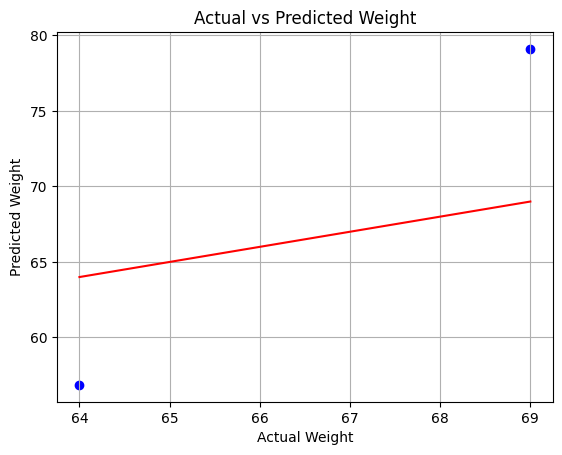

In [140]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weight')
plt.grid(True)
plt.show()
